# Data Exploration: Historical Traffic Accidents from INEGI
This notebook explores traffic accident historical data from INEGI's "Accidentes de Tránsito Terrestre en Zonas Urbanas y Suburbanas" (ATUS). The purpose of this exploration is to understand the structure, quality, and key insights from the dataset before merging it with other traffic-related data sources.

## What is INEGI?

INEGI (Instituto Nacional de Estadística y Geografía) is a Mexican government agency responsible for collecting, processing, and disseminating statistical information about the country’s population, economy, and geography. It provides society and the government with accurate and timely data to support decision-making and public policies.

### About ATUS (Accidentes de Tránsito Terrestre en Zonas Urbanas y Suburbanas)
ATUS is a national dataset collected annually by INEGI. It provides detailed statistics on traffic accidents in non-federal areas, offering insights into transportation risks and aiding in the planning and organization of road infrastructure and accident prevention initiatives.

### Key Characteristics:
- **Geographic Coverage**: Nationwide data, disaggregated at the municipal level.
- **Temporal Coverage**: Data is available annually since 1997, with dissemination occurring seven months after the reference year.
- **Data Sources**: Administrative records from civic courts, public safety agencies, and municipal transit offices.

## Dataset Features

The traffic accident dataset provides the following features:
  - Accident occurrence details: date and time
  - Accident classifications and types
  - Types of vehicles involved
  - Causes of accidents
  - Types and classifications of casualties

## Data Loading

#### Imports

In [1]:
import pandas as pd
import os

#### Read files

In [2]:
folder_path = '../data/inegi_atus_18_23'
files = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        files.append(os.path.join(folder_path, file))

In [3]:
dfs = []
column_names = ['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES','ID_HORA', 'ID_MINUTO', 'ID_DIA', 'DIASEMANA', 
                'URBANA','SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS','PASCAMION', 'OMNIBUS', 'TRANVIA', 
                'CAMIONETA', 'CAMION','TRACTOR', 'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC','CAUSAACCI', 'CAPAROD', 
                'SEXO', 'ALIENTO', 'CINTURON', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 
                'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO','OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'CLASACC','ESTATUS']

for file in files:
    df = pd.read_csv(file, usecols=column_names)
    dfs.append(df)

hist_acc_df = pd.concat(dfs, ignore_index=True)

In [4]:
hist_acc_df.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2020,1,0,0,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2020,1,0,0,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2020,1,0,10,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
3,Municipal,1,1,2020,1,2,0,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
4,Municipal,1,1,2020,1,2,10,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [5]:
hist_acc_df.ANIO.unique()

array([2020, 2021, 2023, 2022, 2019, 2018])

## Data Cleaning

In [6]:
import numpy as np

In [7]:
hist_acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224221 entries, 0 to 2224220
Data columns (total 45 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   COBERTURA     object
 1   ID_ENTIDAD    int64 
 2   ID_MUNICIPIO  int64 
 3   ANIO          int64 
 4   MES           int64 
 5   ID_HORA       int64 
 6   ID_MINUTO     int64 
 7   ID_DIA        int64 
 8   DIASEMANA     object
 9   URBANA        object
 10  SUBURBANA     object
 11  TIPACCID      object
 12  AUTOMOVIL     int64 
 13  CAMPASAJ      int64 
 14  MICROBUS      int64 
 15  PASCAMION     int64 
 16  OMNIBUS       int64 
 17  TRANVIA       int64 
 18  CAMIONETA     int64 
 19  CAMION        int64 
 20  TRACTOR       int64 
 21  FERROCARRI    int64 
 22  MOTOCICLET    int64 
 23  BICICLETA     int64 
 24  OTROVEHIC     int64 
 25  CAUSAACCI     object
 26  CAPAROD       object
 27  SEXO          object
 28  ALIENTO       object
 29  CINTURON      object
 30  ID_EDAD       int64 
 31  CONDMUERTO    int64 
 32

In [8]:
# Filter only for data of Monterrey, Nuevo Leon
hist_acc_df = hist_acc_df[(hist_acc_df.ID_ENTIDAD == 19) & (hist_acc_df.ID_MUNICIPIO == 39)]

In [9]:
hist_acc_df.columns = hist_acc_df.columns.str.lower().str.strip()

In [10]:
hist_acc_df.isnull().sum()

cobertura       0
id_entidad      0
id_municipio    0
anio            0
mes             0
id_hora         0
id_minuto       0
id_dia          0
diasemana       0
urbana          0
suburbana       0
tipaccid        0
automovil       0
campasaj        0
microbus        0
pascamion       0
omnibus         0
tranvia         0
camioneta       0
camion          0
tractor         0
ferrocarri      0
motociclet      0
bicicleta       0
otrovehic       0
causaacci       0
caparod         0
sexo            0
aliento         0
cinturon        0
id_edad         0
condmuerto      0
condherido      0
pasamuerto      0
pasaherido      0
peatmuerto      0
peatherido      0
ciclmuerto      0
ciclherido      0
otromuerto      0
otroherido      0
nemuerto        0
neherido        0
clasacc         0
estatus         0
dtype: int64

In [11]:
hist_acc_df.head()

,cobertura,id_entidad,id_municipio,anio,mes,id_hora,id_minuto,id_dia,diasemana,urbana,...,peatmuerto,peatherido,ciclmuerto,ciclherido,otromuerto,otroherido,nemuerto,neherido,clasacc,estatus
186119,Municipal,19,39,2020,1,0,15,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
186120,Municipal,19,39,2020,1,0,51,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
186121,Municipal,19,39,2020,1,1,43,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
186122,Municipal,19,39,2020,1,1,43,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
186123,Municipal,19,39,2020,1,2,18,1,Miercoles,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [12]:
hist_acc_df = hist_acc_df.reset_index(drop=True)

In [13]:
for column in hist_acc_df.columns:
    unique_values = hist_acc_df[column].unique()
    print(f"Column: {column}")
    print(f"{unique_values}")
    print("-"*40)

Column: cobertura
['Municipal']
----------------------------------------
Column: id_entidad
[19]
----------------------------------------
Column: id_municipio
[39]
----------------------------------------
Column: anio
[2020 2021 2023 2022 2019 2018]
----------------------------------------
Column: mes
[ 1  2  3  4  5  6  7  8  9 10 11 12]
----------------------------------------
Column: id_hora
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 17]
----------------------------------------
Column: id_minuto
[15 51 43 18  0 25 34  4 41 45 50 54 13 35  3 10  1 20 27 30 39 55 26 47
 24 29 31 40 22 36 23 17 14 44  7 42 59  9 21 56 58 57 33 12 19 38  2 37
 28  8 53 16 49 46 48 52  6 32 11  5]
----------------------------------------
Column: id_dia
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
----------------------------------------
Column: diasemana
['Miercoles' 'Jueves' 'Viernes' 'Sabado' 'Domingo' 'lunes' 'Martes'
 'Lune

In [14]:
# Removing unnecessary columna or those that only have one value
hist_acc_df = hist_acc_df.drop(columns=["cobertura", "id_entidad", "id_municipio", "suburbana", "estatus", "caparod", "cinturon"])

In [15]:
hist_acc_df.diasemana = hist_acc_df.diasemana.replace({
    'Miércoles': 'Miercoles',
    'Sábado': 'Sabado',
    'lunes': 'Lunes'
})

In [16]:
# New column for casualties of accidents killed
hist_acc_df['casualties_kil'] = hist_acc_df[['condmuerto', 'pasamuerto', 'peatmuerto', 'ciclmuerto', 'otromuerto', 'nemuerto']].sum(axis=1)

In [17]:
# New column for casualties of accidents injured
hist_acc_df['casualties_inj'] = hist_acc_df[['condherido', 'pasaherido', 'peatherido', 'ciclherido', 'otroherido', 'neherido']].sum(axis=1)

In [64]:
hist_acc_df['heavy_vehicles'] = hist_acc_df[['pascamion', 'omnibus', 'tranvia', 'camion', 'tractor', 'ferrocarri']].sum(axis=1)
hist_acc_df['light_vehicles'] = hist_acc_df[['automovil', 'campasaj', 'camioneta', 'microbus']].sum(axis=1)
hist_acc_df['two_wheelers'] = hist_acc_df[['motociclet', 'bicicleta']].sum(axis=1)
hist_acc_df['other_vehicles'] = hist_acc_df['otrovehic']

## EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Historical

##### Yearly Distribution of Accidents by Sex

<Figure size 1400x800 with 0 Axes>

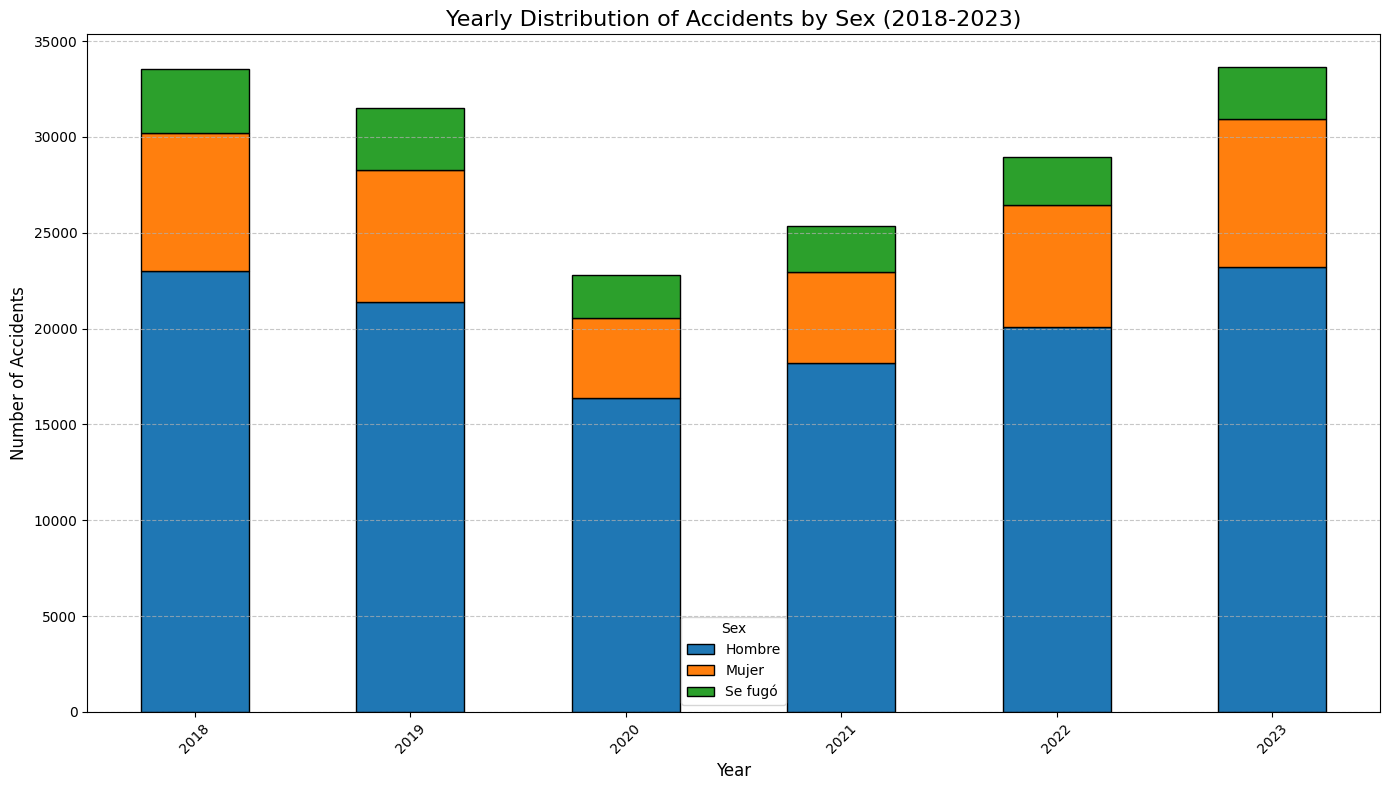

In [19]:
grouped_date_data = hist_acc_df.groupby(['anio', 'sexo']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
grouped_date_data.plot(kind='bar', stacked=True, figsize=(14, 8), edgecolor='black')

plt.title('Yearly Distribution of Accidents by Sex (2018-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Comments: 2020 and 2021 are pandemic results. By 2023, results reach same as it was on 2018. 2020 population census showed that there are 5 million people, 50% women, 50% men. However, I couldn't find any data regarding the female and male population that drive a car. 

The current graph doesn't really show an increase in the number of accidents in the last 5 years, nor for men nor women. 

Only thing interesting is that it is more than three times bigger the number of accidents cause by men than women.

##### Yearly distribution of Casualties

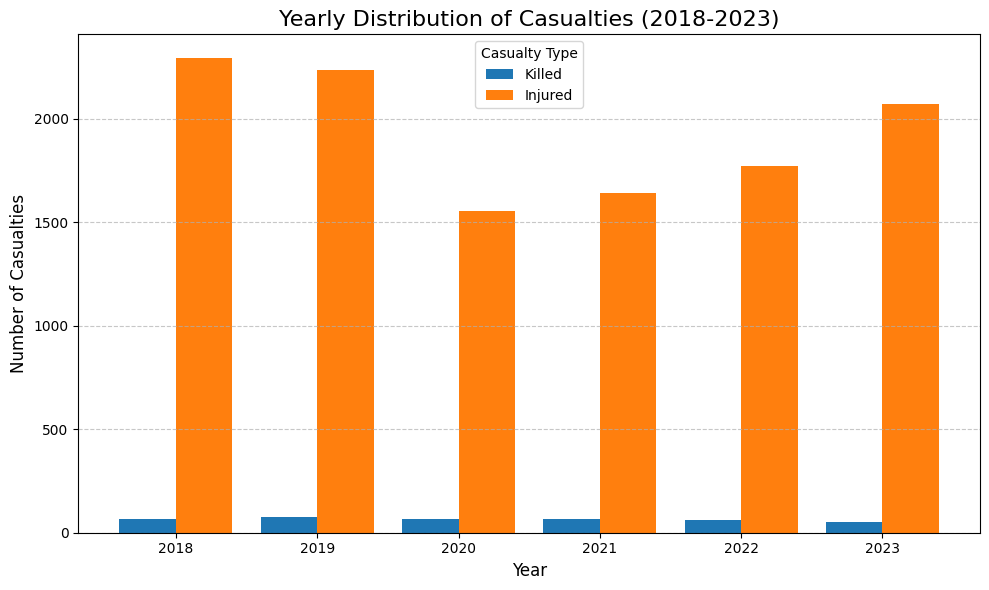

In [20]:
grouped_casualties_data = hist_acc_df.groupby('anio')[['casualties_kil', 'casualties_inj']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_casualties_data['anio'] - 0.2, grouped_casualties_data['casualties_kil'], width=0.4, label='Killed')
plt.bar(grouped_casualties_data['anio'] + 0.2, grouped_casualties_data['casualties_inj'], width=0.4, label='Injured')

plt.title('Yearly Distribution of Casualties (2018-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.xticks(grouped_casualties_data['anio'])
plt.legend(title='Casualty Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

NameError: name 'yearly_data' is not defined

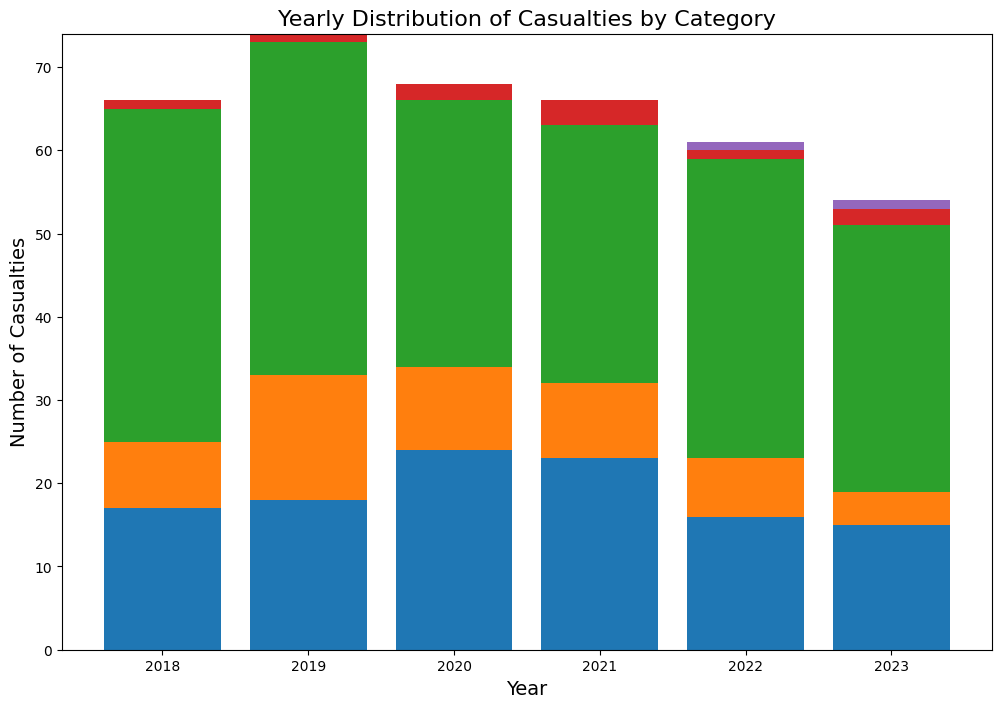

In [21]:
kil_yearly_data = hist_acc_df[['anio','condmuerto', 'pasamuerto', 'peatmuerto', 'ciclmuerto', 'otromuerto', 'nemuerto']].groupby('anio').sum()

categories = ['condmuerto', 'pasamuerto', 'peatmuerto', 'ciclmuerto', 'otromuerto', 'nemuerto']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Stacked bar chart
plt.figure(figsize=(12, 8))
bottom = None
for category, color in zip(categories, colors):
    if bottom is None:
        bottom = kil_yearly_data[category]
        plt.bar(kil_yearly_data.index, kil_yearly_data[category], label=category.replace('_', ' ').title(), color=color)
    else:
        plt.bar(kil_yearly_data.index, kil_yearly_data[category], bottom=bottom, label=category.replace('_', ' ').title(), color=color)
        bottom += kil_yearly_data[category]

plt.title('Yearly Distribution of Casualties by Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
plt.xticks(yearly_data.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12)
plt.tight_layout()

plt.show()

NameError: name 'yearly_data' is not defined

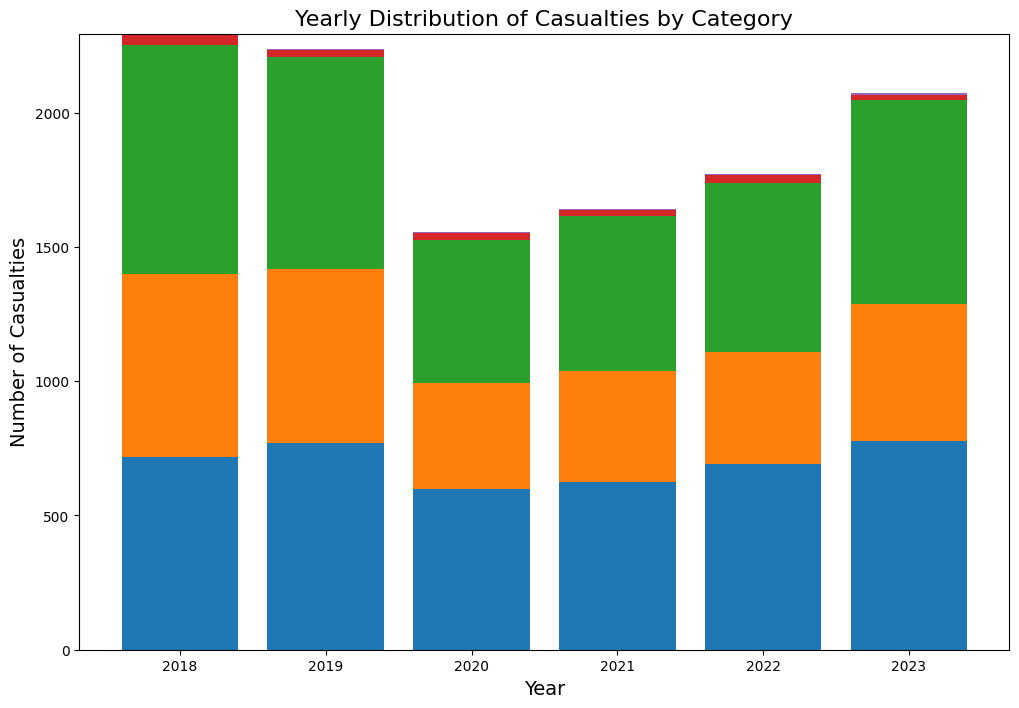

In [22]:
inj_yearly_data = hist_acc_df[['anio','condherido', 'pasaherido', 'peatherido', 'ciclherido', 'otroherido', 'neherido']].groupby('anio').sum()

# Prepare the data for plotting
categories = ['condherido', 'pasaherido', 'peatherido', 'ciclherido', 'otroherido', 'neherido']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Stacked bar chart
plt.figure(figsize=(12, 8))
bottom = None
for category, color in zip(categories, colors):
    if bottom is None:
        bottom = inj_yearly_data[category]
        plt.bar(inj_yearly_data.index, inj_yearly_data[category], label=category.replace('_', ' ').title(), color=color)
    else:
        plt.bar(inj_yearly_data.index, inj_yearly_data[category], bottom=bottom, label=category.replace('_', ' ').title(), color=color)
        bottom += inj_yearly_data[category]

plt.title('Yearly Distribution of Casualties by Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
plt.xticks(yearly_data.index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12)
plt.tight_layout()

plt.show()

##### Fatality

<Figure size 1400x800 with 0 Axes>

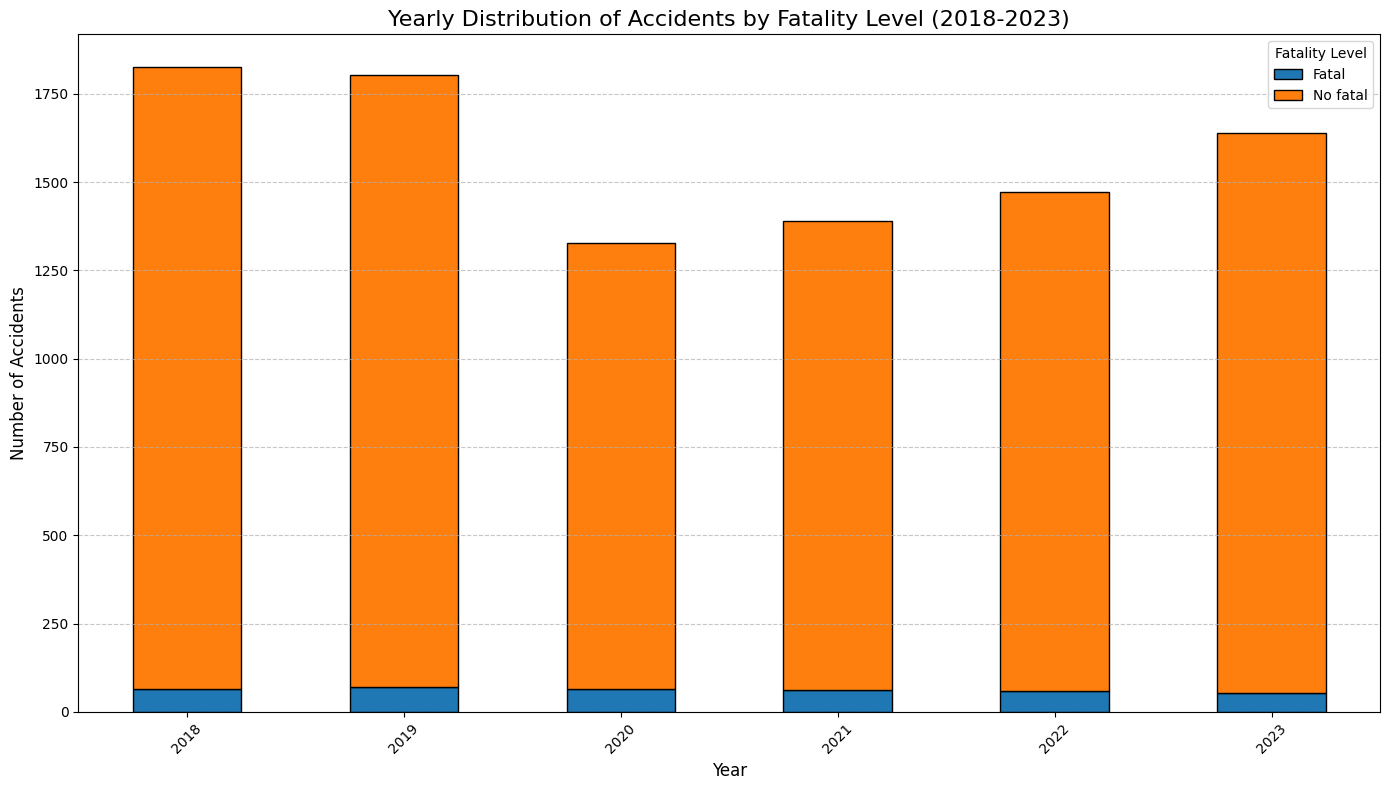

In [23]:
fatal_acc = hist_acc_df[(hist_acc_df.clasacc == 'Fatal') | (hist_acc_df.clasacc == 'No fatal')]
grouped_date_data = fatal_acc.groupby(['anio', 'clasacc']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
grouped_date_data.plot(kind='bar', stacked=True, figsize=(14, 8), edgecolor='black')

plt.title('Yearly Distribution of Accidents by Fatality Level (2018-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Fatality Level', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

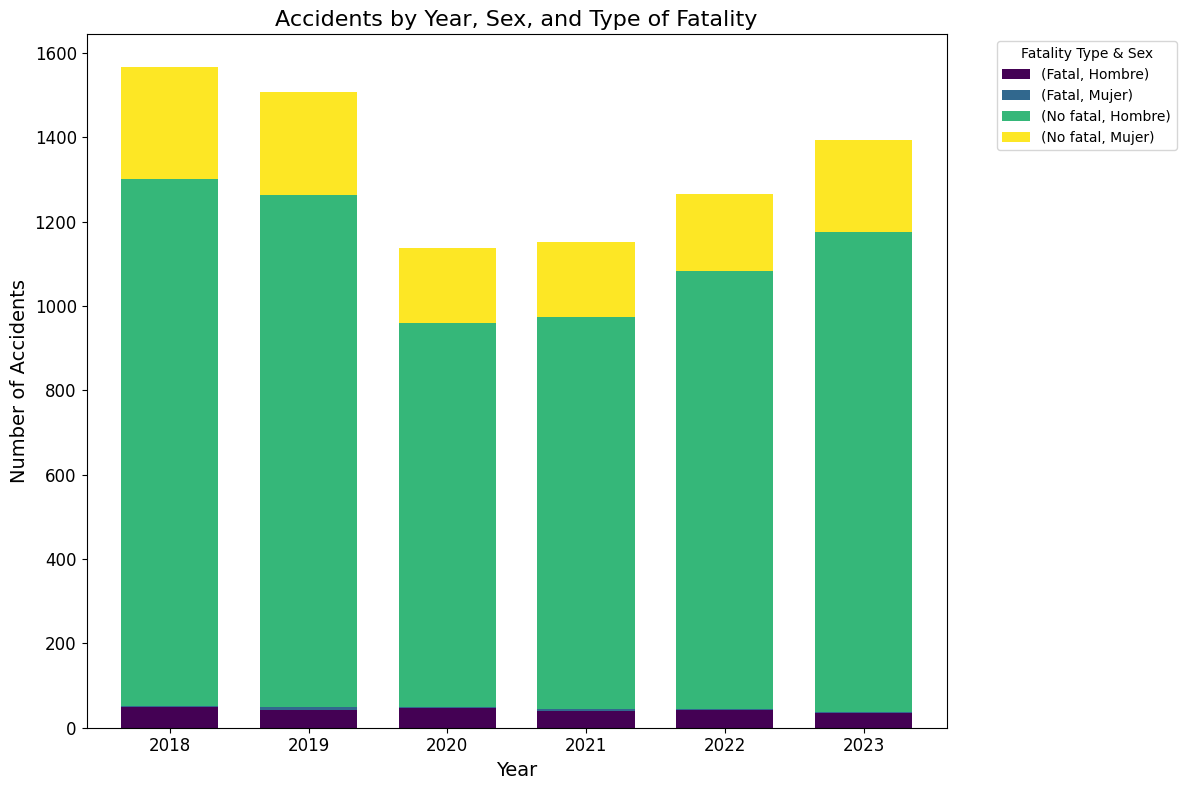

In [24]:
fatal_acc = fatal_acc[fatal_acc.sexo != 'Se fugó']
accident_counts = fatal_acc.groupby(['anio', 'clasacc', 'sexo']).size().reset_index(name='accidents')

pivot_fatality_data = accident_counts.pivot_table(index='anio', columns=['clasacc', 'sexo'], values='accidents', fill_value=0)

ax = pivot_fatality_data.plot(kind='bar', figsize=(12, 8), stacked=True, width=0.7, cmap='viridis')

plt.title('Accidents by Year, Sex, and Type of Fatality', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Fatality Type & Sex', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

##### Date and time Distribution

In [25]:
def plot_popular_day_of_week():

    grouped_data = hist_acc_df.groupby(['anio', 'diasemana']).size().reset_index(name='accident_count')

    pivot_data = grouped_data.pivot_table(index='anio', columns='diasemana', values='accident_count', fill_value=0)

    # Reorder days of the week by their total number of accidents across all years
    day_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
    pivot_data = pivot_data[day_order]

    ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

    # Adding count labels to the bars
    for i, year in enumerate(pivot_data.index):
        bottom_offset = 0  # Track the bottom of the stacked bar
        for day in pivot_data.columns:
            count = pivot_data.loc[year, day]
            if count > 0:
                ax.text(
                    i, 
                    bottom_offset + count / 2,  # Place the text in the middle of the segment
                    str(count), 
                    ha='center', va='center', fontsize=10, color='white'
                )
            bottom_offset += count
            
    plt.title('Accidents by Day of the Week for Each Year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Day of the Week', fontsize=12)
    plt.tight_layout()

    plt.show()

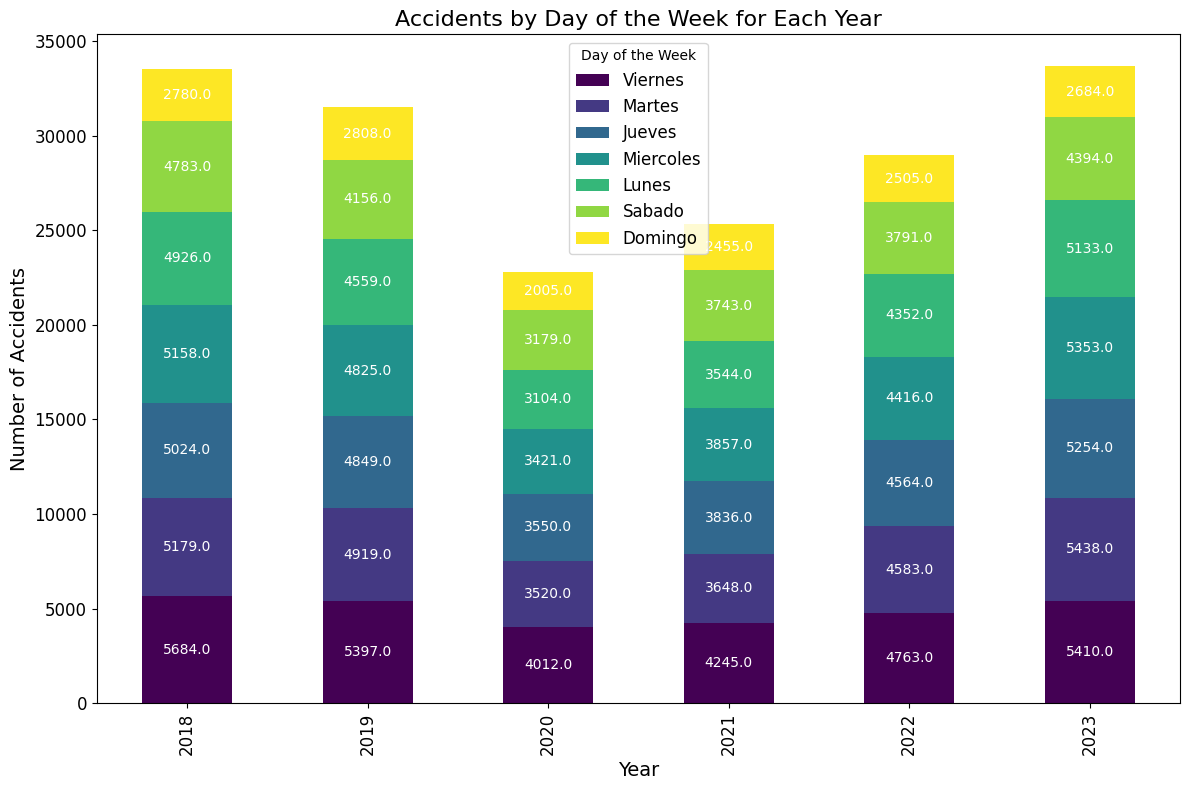

In [26]:
plot_popular_day_of_week()

In [28]:
# Map numeric months to month names for readability
hist_acc_df = hist_acc_df.rename(columns={'mes': 'id_mes'})
month_map = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
        6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
        11: 'November', 12: 'December'
    }
hist_acc_df['mes'] = hist_acc_df['id_mes'].map(month_map)

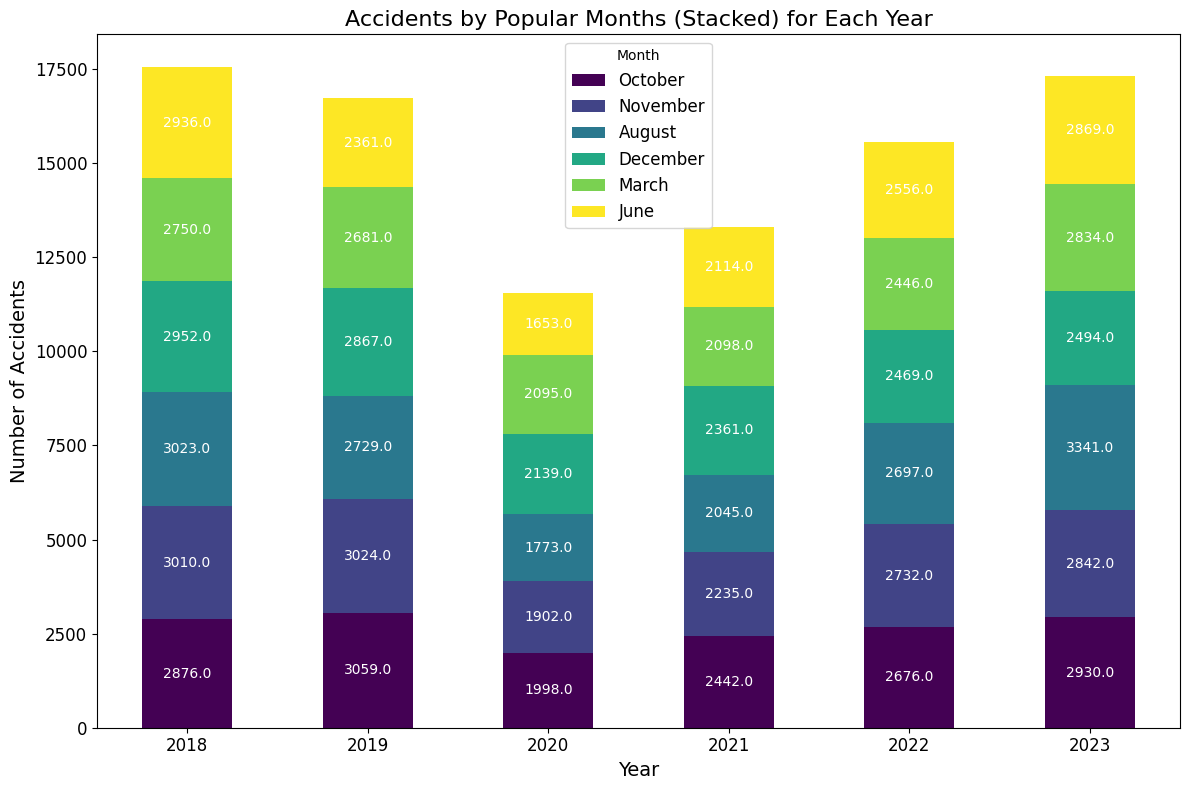

In [29]:
def plot_accidents_by_month(dataframe, year_column, month_column):
   
    grouped_data = dataframe.groupby([year_column, month_column]).size().reset_index(name='accident_count')

    popular_months = (
        grouped_data.groupby(month_column)['accident_count'].sum()
        .nlargest(6).index
    )

    # Filter the grouped data to include only the five most popular months
    filtered_data = grouped_data[grouped_data[month_column].isin(popular_months)]

    # Pivot the data to prepare for a stacked bar chart
    pivot_data = filtered_data.pivot_table(index=year_column, columns=month_column, values='accident_count', fill_value=0)

    # Reorder months by their total number of accidents across all years
    month_order = pivot_data.sum(axis=0).sort_values(ascending=False).index
    pivot_data = pivot_data[month_order]

    ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

    # Adding count labels to the bars
    for i, year in enumerate(pivot_data.index):
        bottom_offset = 0  # Track the bottom of the stacked bar
        for month in pivot_data.columns:
            count = pivot_data.loc[year, month]
            if count > 0:
                ax.text(
                    i,
                    bottom_offset + count / 2,  # Place the text in the middle of the segment
                    str(count),
                    ha='center', va='center', fontsize=10, color='white'
                )
            bottom_offset += count

    plt.title('Accidents by Popular Months for Each Year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Month', fontsize=12)
    plt.tight_layout()

    plt.show()

plot_accidents_by_month(hist_acc_df, year_column='anio', month_column='mes')

In [30]:
def most_popular_month_each_year(dataframe, year_column, month_column):
    # Group by year and month, and count accidents
    grouped_data = dataframe.groupby([year_column, month_column]).size().reset_index(name='accident_count')

     # Find the six most popular months
    most_popular = grouped_data.nlargest(30, 'accident_count')

    return most_popular

result = most_popular_month_each_year(hist_acc_df, year_column='anio', month_column='mes')

In [31]:
result.head()

,anio,mes,accident_count
61,2023,August,3341
22,2019,October,3059
21,2019,November,3024
1,2018,August,3023
9,2018,November,3010


In [32]:
result.mes.value_counts()

mes
August       4
October      4
November     4
March        3
September    2
December     2
June         2
May          2
July         2
February     2
January      2
April        1
Name: count, dtype: int64

Observations: Most popular months August-December

##### Age

In [33]:
def plot_accident_age_distribution(year):

    age_bins = [0, 20, 30, 40, 50, 60, 100]
    age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']
    
    filtered_data = hist_acc_df[(hist_acc_df['anio'] == year) & (hist_acc_df['sexo'] != "Se fugó")]

    # Create age groups
    filtered_data.loc[:, 'age_group'] = pd.cut(
        filtered_data['id_edad'], bins=age_bins, labels=age_labels, right=False
    )

    age_grouped_data = filtered_data.groupby(['age_group', 'sexo'], observed=True).size().reset_index(name='accidents')

    plt.figure(figsize=(12, 8))
    sns.barplot(data=age_grouped_data, x='age_group', y='accidents', hue='sexo')

    plt.title(f'Accident Distribution by Age and Sex in {year}', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Sex', fontsize=12)
    plt.tight_layout()

    plt.show()

/var/folders/x3/ksb10fdj52b1btlf9x9_nkx00000gn/T/ipykernel_27343/2687140197.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'age_group'] = pd.cut(


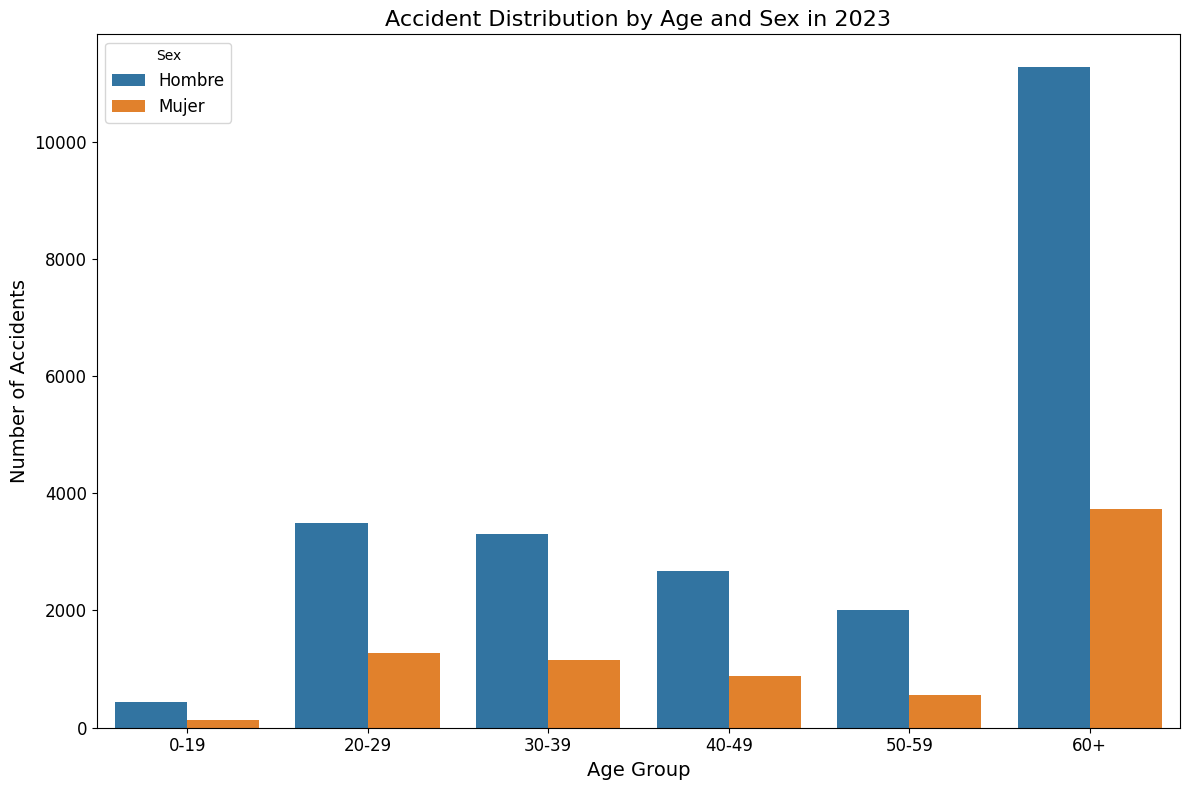

In [34]:
plot_accident_age_distribution(2023)

##### Time and date

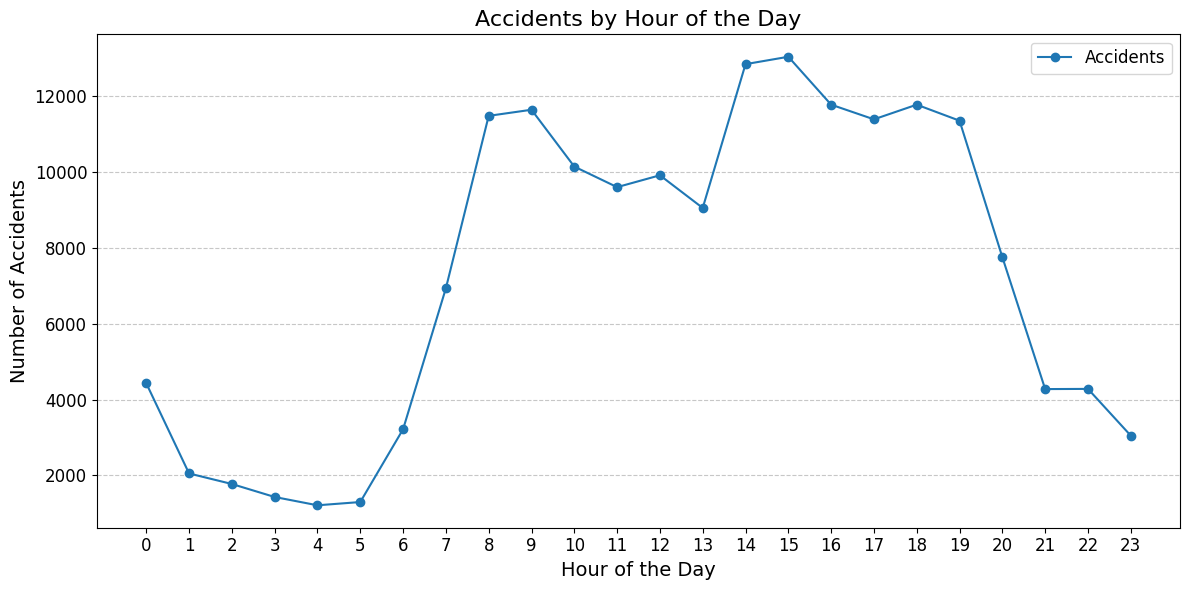

In [35]:
def plot_accidents_by_hour(df, hour_column, minute_column):
    df['time'] = df[hour_column]
    
    grouped_data = df.groupby('time').size().reset_index(name='accident_count')

    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data['time'], grouped_data['accident_count'], marker='o', linestyle='-', label='Accidents')

    plt.title('Accidents by Hour of the Day', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.xticks(range(0, 24), fontsize=12)  
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()

    plt.show()

plot_accidents_by_hour(hist_acc_df, hour_column='id_hora', minute_column='id_minuto')

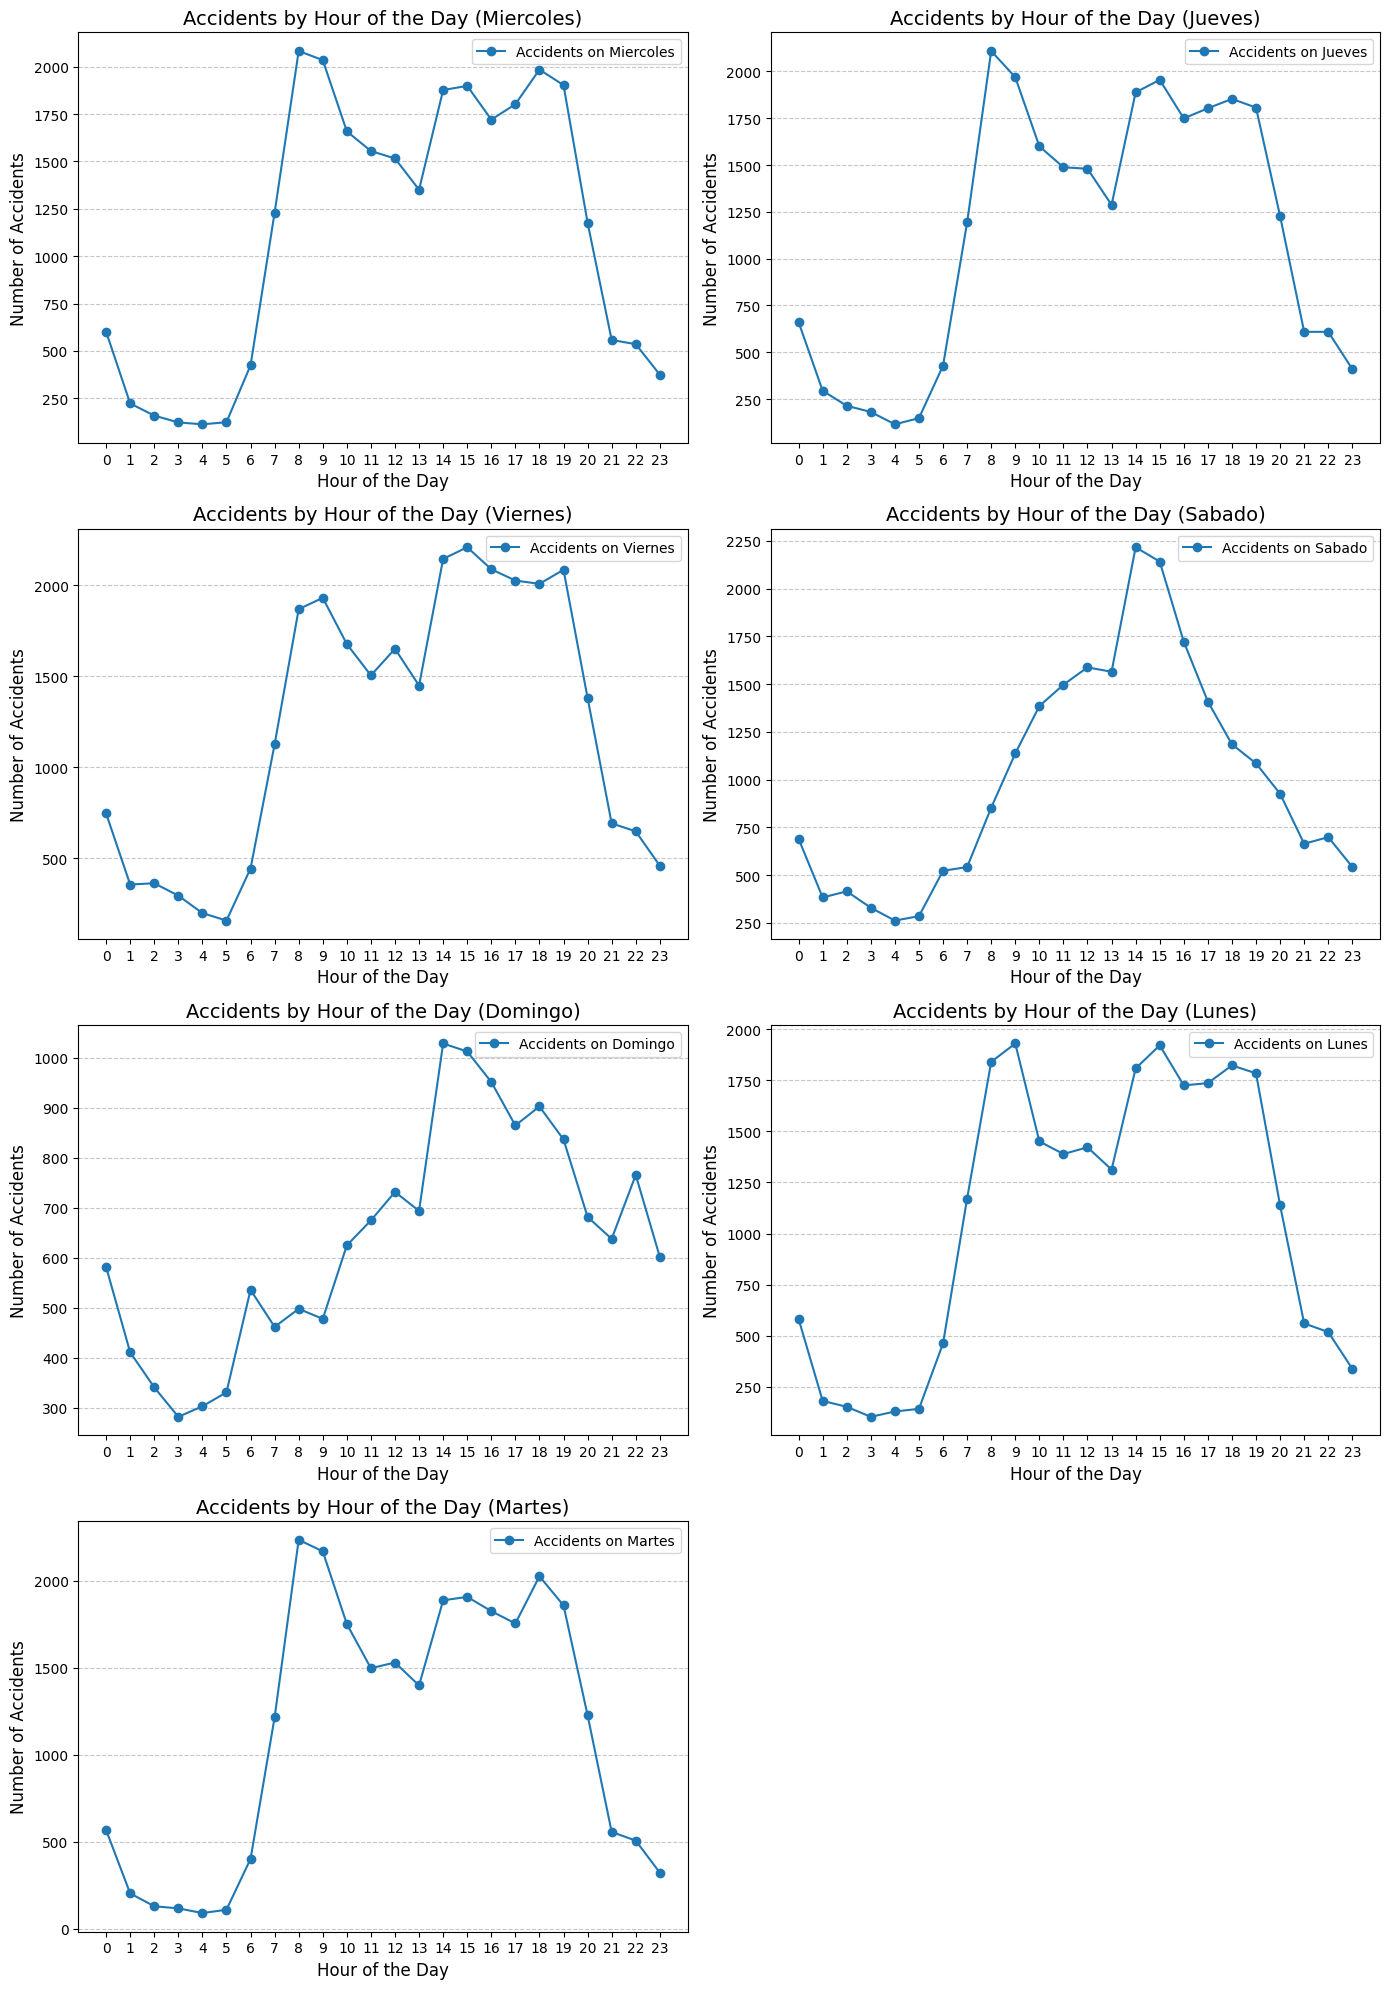

In [36]:
def plot_accidents_by_hour_and_weekday(dataframe, hour_column, minute_column, weekday_column):
    dataframe['time'] = dataframe.apply(lambda row: time(row[hour_column], row[minute_column]), axis=1)

    dataframe['hour'] = dataframe[hour_column]

    weekdays = dataframe[weekday_column].unique()

    plt.figure(figsize=(14, 20))
    for i, day in enumerate(weekdays, start=1):
        filtered_data = dataframe[dataframe[weekday_column] == day]

        grouped_data = filtered_data.groupby('hour').size().reset_index(name='accident_count')

        plt.subplot(4, 2, i)
        plt.plot(grouped_data['hour'], grouped_data['accident_count'], marker='o', linestyle='-', label=f'Accidents on {day}')
        
        plt.title(f'Accidents by Hour of the Day ({day})', fontsize=14)
        plt.xlabel('Hour of the Day', fontsize=12)
        plt.ylabel('Number of Accidents', fontsize=12)
        plt.xticks(range(0, 24), fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(fontsize=10)

    plt.tight_layout()
    plt.show()


plot_accidents_by_hour_and_weekday(hist_acc_df, hour_column='id_hora', minute_column='id_minuto', weekday_column='diasemana')

In [38]:
hist_acc_df.anio.value_counts()

anio
2023    33666
2018    33534
2019    31513
2022    28974
2021    25328
2020    22791
Name: count, dtype: int64

##### Accident type and causes

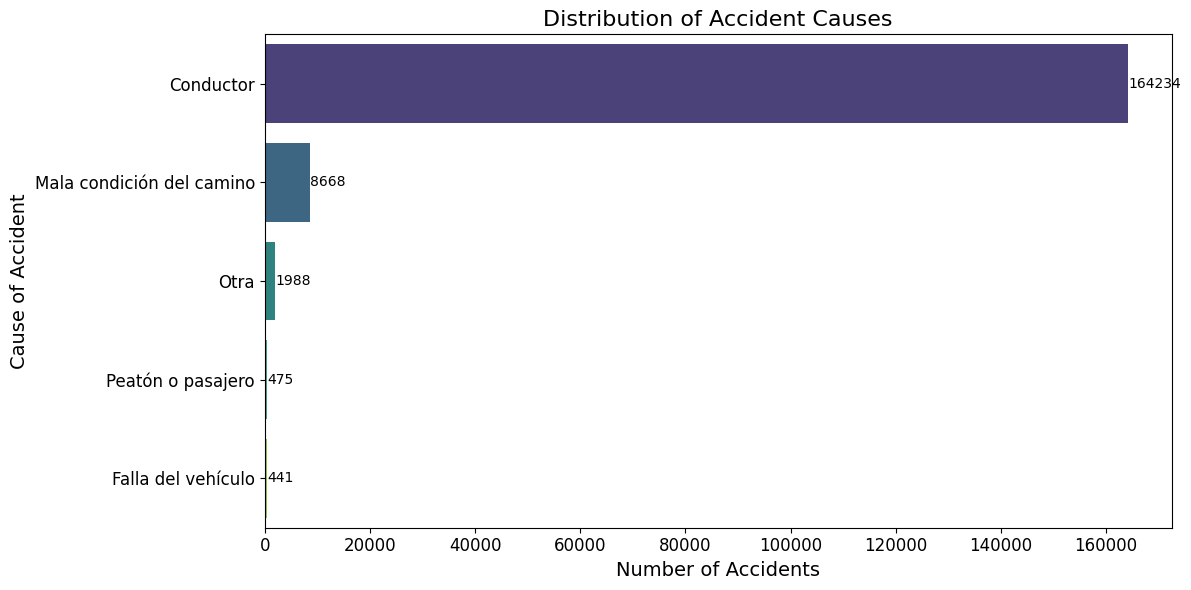

In [39]:
def plot_accident_causes(dataframe, cause_column):
    grouped_data = dataframe.groupby(cause_column).size().reset_index(name='accident_count')

    # Sort by the number of accidents
    grouped_data = grouped_data.sort_values(by='accident_count', ascending=False)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=grouped_data, x='accident_count', y=cause_column, palette='viridis', hue=cause_column)

    # Adding count labels
    for bar in ax.patches:
        # Get the dimensions of the bar
        x = bar.get_width()  # Bar width (value)
        y = bar.get_y() + bar.get_height() / 2  # Center vertically

        # Place the label
        ax.text(x + 0.1, y, f"{int(x)}", va='center', fontsize=10, color='black')

    plt.title('Distribution of Accident Causes', fontsize=16)
    plt.xlabel('Number of Accidents', fontsize=14)
    plt.ylabel('Cause of Accident', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.show()

plot_accident_causes(hist_acc_df, cause_column='causaacci')


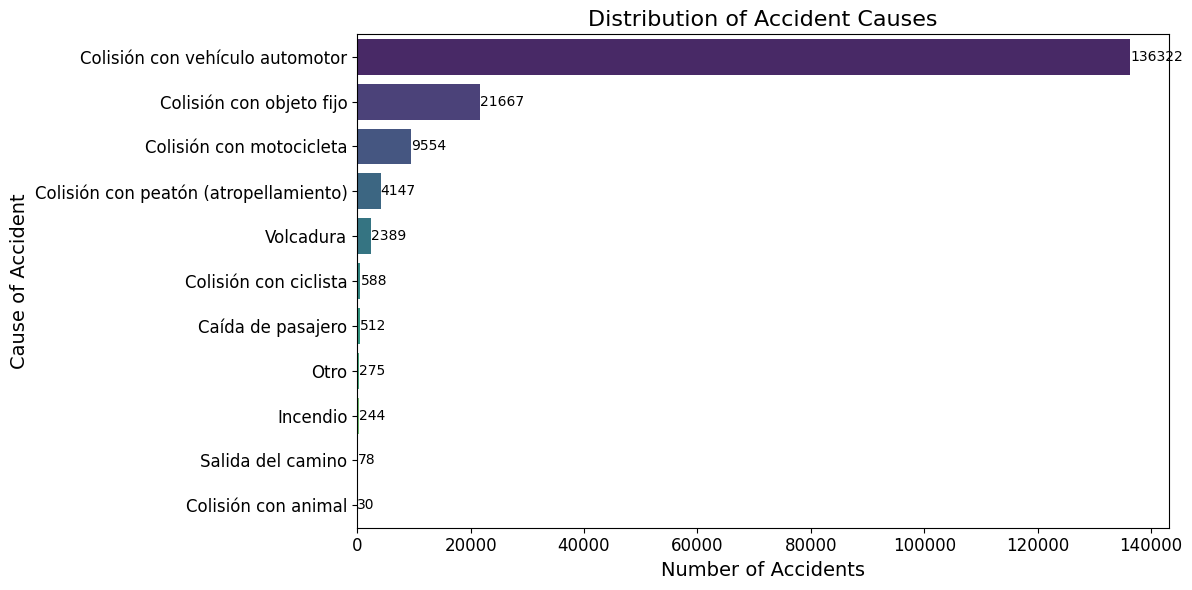

In [40]:
plot_accident_causes(hist_acc_df, cause_column='tipaccid')

### Export cleaned data

In [65]:
acc_df = hist_acc_df[hist_acc_df.anio == 2023]

In [66]:
acc_df = acc_df.reset_index()
acc_df

,index,anio,id_mes,id_hora,id_minuto,id_dia,diasemana,urbana,tipaccid,automovil,...,clasacc,casualties_kil,casualties_inj,mes,time,hour,heavy_vehicles,light_vehicles,two_wheelers,other_vehicles
0,48119,2023,1,1,18,1,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,Sólo daños,0,0,January,01:18:00,1,0,2,0,0
1,48120,2023,1,4,44,1,Domingo,Accidente en intersección,Incendio,1,...,Sólo daños,0,0,January,04:44:00,4,0,1,0,0
2,48121,2023,1,7,17,1,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,Sólo daños,0,0,January,07:17:00,7,0,2,0,0
3,48122,2023,1,8,6,1,Domingo,Accidente en intersección,Colisión con objeto fijo,1,...,Sólo daños,0,0,January,08:06:00,8,0,1,0,0
4,48123,2023,1,10,10,1,Domingo,Accidente en intersección,Colisión con objeto fijo,1,...,Sólo daños,0,0,January,10:10:00,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33661,81780,2023,12,20,43,31,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,Sólo daños,0,0,December,20:43:00,20,0,2,0,0
33662,81781,2023,12,20,56,31,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,No fatal,0,1,December,20:56:00,20,0,2,0,0
33663,81782,2023,12,21,45,31,Domingo,Accidente en intersección,Colisión con motocicleta,1,...,No fatal,0,2,December,21:45:00,21,0,1,2,0
33664,81783,2023,12,22,7,31,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,Sólo daños,0,0,December,22:07:00,22,0,2,0,0


In [67]:
# Rename columns to 'year', 'month', 'day' as required by pd.to_datetime
acc_df.rename(columns={"anio": "year", "id_mes": "month", "id_dia": "day"}, inplace=True)
acc_df['date'] = pd.to_datetime(acc_df[['year', 'month', 'day']])
#acc_df['Date'] = pd.to_datetime(acc_df[['anio', 'id_mes', 'id_dia']])

In [68]:
acc_df

,index,year,month,id_hora,id_minuto,day,diasemana,urbana,tipaccid,automovil,...,casualties_kil,casualties_inj,mes,time,hour,heavy_vehicles,light_vehicles,two_wheelers,other_vehicles,date
0,48119,2023,1,1,18,1,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,0,0,January,01:18:00,1,0,2,0,0,2023-01-01
1,48120,2023,1,4,44,1,Domingo,Accidente en intersección,Incendio,1,...,0,0,January,04:44:00,4,0,1,0,0,2023-01-01
2,48121,2023,1,7,17,1,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,0,0,January,07:17:00,7,0,2,0,0,2023-01-01
3,48122,2023,1,8,6,1,Domingo,Accidente en intersección,Colisión con objeto fijo,1,...,0,0,January,08:06:00,8,0,1,0,0,2023-01-01
4,48123,2023,1,10,10,1,Domingo,Accidente en intersección,Colisión con objeto fijo,1,...,0,0,January,10:10:00,10,0,1,0,0,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33661,81780,2023,12,20,43,31,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,0,0,December,20:43:00,20,0,2,0,0,2023-12-31
33662,81781,2023,12,20,56,31,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,0,1,December,20:56:00,20,0,2,0,0,2023-12-31
33663,81782,2023,12,21,45,31,Domingo,Accidente en intersección,Colisión con motocicleta,1,...,0,2,December,21:45:00,21,0,1,2,0,2023-12-31
33664,81783,2023,12,22,7,31,Domingo,Accidente en intersección,Colisión con vehículo automotor,2,...,0,0,December,22:07:00,22,0,2,0,0,2023-12-31


In [69]:
acc_df.columns

Index(['index', 'year', 'month', 'id_hora', 'id_minuto', 'day', 'diasemana',
       'urbana', 'tipaccid', 'automovil', 'campasaj', 'microbus', 'pascamion',
       'omnibus', 'tranvia', 'camioneta', 'camion', 'tractor', 'ferrocarri',
       'motociclet', 'bicicleta', 'otrovehic', 'causaacci', 'sexo', 'aliento',
       'id_edad', 'condmuerto', 'condherido', 'pasamuerto', 'pasaherido',
       'peatmuerto', 'peatherido', 'ciclmuerto', 'ciclherido', 'otromuerto',
       'otroherido', 'nemuerto', 'neherido', 'clasacc', 'casualties_kil',
       'casualties_inj', 'mes', 'time', 'hour', 'heavy_vehicles',
       'light_vehicles', 'two_wheelers', 'other_vehicles', 'date'],
      dtype='object')

In [70]:
acc_df = acc_df.drop(['index', 'id_hora', 'id_minuto', 'day', 'year', 'month', 'automovil', 'diasemana', 'campasaj', 'microbus', 
                      'pascamion', 'omnibus', 'tranvia', 'camioneta', 'camion', 'tractor', 'ferrocarri', 'motociclet', 'bicicleta', 
                      'otrovehic', 'condmuerto', 'condherido', 'pasamuerto', 'pasaherido', 'peatmuerto', 'peatherido', 'ciclmuerto',
                      'ciclherido', 'otromuerto', 'otroherido', 'nemuerto', 'neherido', 'mes', 'hour'], axis=1)

In [71]:
acc_df

,urbana,tipaccid,automovil,causaacci,sexo,aliento,id_edad,clasacc,casualties_kil,casualties_inj,time,heavy_vehicles,light_vehicles,two_wheelers,other_vehicles,date
0,Accidente en intersección,Colisión con vehículo automotor,2,Conductor,Se fugó,Se ignora,0,Sólo daños,0,0,01:18:00,0,2,0,0,2023-01-01
1,Accidente en intersección,Incendio,1,Conductor,Se fugó,Se ignora,0,Sólo daños,0,0,04:44:00,0,1,0,0,2023-01-01
2,Accidente en intersección,Colisión con vehículo automotor,2,Conductor,Hombre,No,62,Sólo daños,0,0,07:17:00,0,2,0,0,2023-01-01
3,Accidente en intersección,Colisión con objeto fijo,1,Conductor,Mujer,No,99,Sólo daños,0,0,08:06:00,0,1,0,0,2023-01-01
4,Accidente en intersección,Colisión con objeto fijo,1,Conductor,Mujer,No,69,Sólo daños,0,0,10:10:00,0,1,0,0,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33661,Accidente en intersección,Colisión con vehículo automotor,2,Conductor,Hombre,No,43,Sólo daños,0,0,20:43:00,0,2,0,0,2023-12-31
33662,Accidente en intersección,Colisión con vehículo automotor,2,Conductor,Hombre,No,18,No fatal,0,1,20:56:00,0,2,0,0,2023-12-31
33663,Accidente en intersección,Colisión con motocicleta,1,Conductor,Hombre,No,20,No fatal,0,2,21:45:00,0,1,2,0,2023-12-31
33664,Accidente en intersección,Colisión con vehículo automotor,2,Conductor,Mujer,No,99,Sólo daños,0,0,22:07:00,0,2,0,0,2023-12-31


In [72]:
file_path = "../data/accidents_2.csv"
acc_df.to_csv(file_path, index=False)